In [50]:
%matplotlib inline
from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # Tensorflow ONLY
from keras.applications import VGG16
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image

In [51]:
MODELS = {
    "vgg16": (VGG16, (224, 224)),
    "vgg19": (VGG19, (224, 224)),
    "inception": (InceptionV3, (299, 299)),
    "xception": (Xception, (299, 299)), # TensorFlow ONLY
    "resnet": (ResNet50, (224, 224))
}

In [52]:
def image_load_and_convert(image_path, model):

    pil_im = Image.open(image_path, 'r')
    imshow(np.asarray(pil_im))
    
    # initialize the input image shape 
    # and the pre-processing function (this might need to be changed
    inputShape = MODELS[model][1]
    preprocess = imagenet_utils.preprocess_input
    image = load_img(image_path, target_size=inputShape)
    image = img_to_array(image)
    # the original networks have been trained on an addiitonal
    # dimension taking into account the batch size
    # we need to add this dimension for consistency
    # even if we have one image only
    image = np.expand_dims(image, axis=0)
    image = preprocess(image)
    
    return image

In [56]:
def classify_image(image_path, model):
    img = image_load_and_convert(image_path, model)
    Network = MODELS[model][0]
    model = Network(weights="imagenet")
    preds = model.predict(img)
    P = imagenet_utils.decode_predictions(preds)
    # loop over the predictions and display the rank-5 predictions 
    # along with probabilities
    for (i, (imagenetID, label, prob)) in enumerate(P[0]):
        print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

   229376/553467096 [..............................] - ETA: 2:40:40

KeyboardInterrupt: 

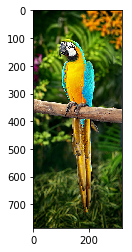

In [58]:
classify_image("images/parrot.jpg", "vgg16")

In [62]:
def print_model(model):
    print('model: ', model)
    Networks = MODELS[model][0]
    model.summary()

In [63]:
print_model('vgg16')

model:  vgg16


AttributeError: 'str' object has no attribute 'summary'

In [61]:
print_model('vgg19')

NameError: name 'model' is not defined

In [64]:
print_model('inception')

model:  inception


AttributeError: 'str' object has no attribute 'summary'

In [65]:
print_model('resnet')

model:  resnet


AttributeError: 'str' object has no attribute 'summary'

In [66]:
def image_load(image_path):
    pil_im = Image.open(image_path, 'r')
    pil_im.show()

In [67]:
image_load('images/imagenet_vggnet_table1.png')

In [68]:
image_load('images/imagenet_resnet_identity.png')

In [ ]:
image_load('images/imagenet_xception_flow.png')

In [ ]:
image_load('images/imagenet_resnet_identity.png')

In [ ]:
image_load('images/imagenet_resnet_residual.png')